# Filosofos
O intuito deste notebook e generalizar a pesquisa de popularidade de grafos dos artistas para uma base de filósofos.


### Funções Básicas
Aqui é colocado as funções básicas, que criam o csv, geram o grafo e fazem uma vizualização de um subgrafo aleatório para fins de verificação do grafo.

In [1]:
from filosofosutils import *

In [2]:
filosofos_network = get_grafo()

In [3]:
df = get_pandas_csv()
df

,filosofo
id,
0,Camille_Moubarak
1,Jürgen_Habermas
2,Carl_Gustav_Hempel
3,Robert_Nozick
4,Peter_Achinstein
...,...
3887,Paul_Bernays
3888,Minna_Specht
3889,"Sir_William_Hamilton,_9th_Baronet__William_Ham..."


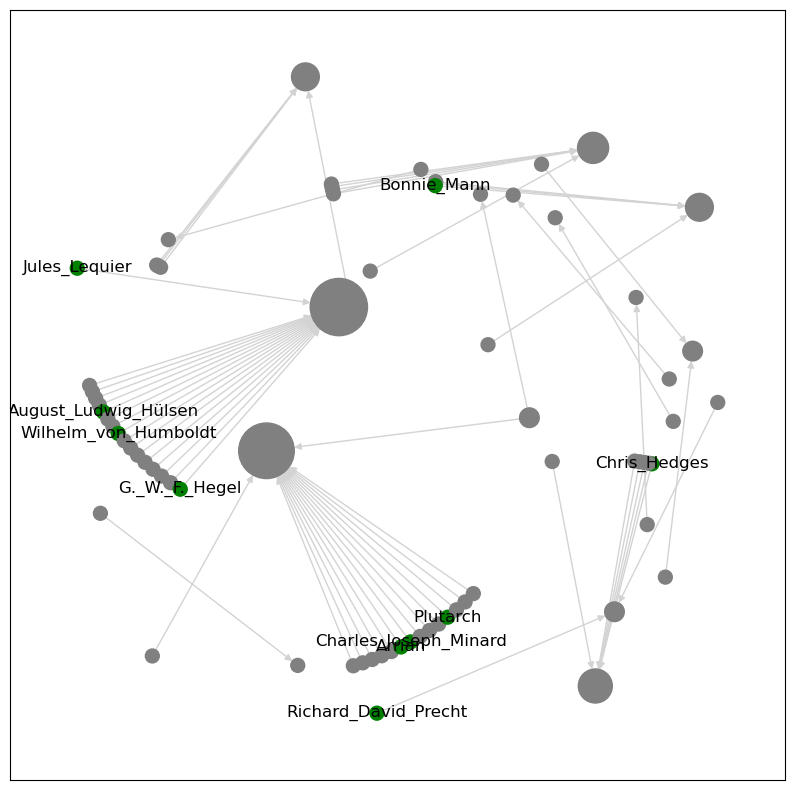

In [4]:
np.random.seed(42)
gera_grafico(grafo=filosofos_network,df=df)

In [5]:
disrupcao = computar_disrupcao(filosofos_network)

### Cálculo da Disrupção
Seguindo algumas análises da parte dos artistas foi cálculado a disrupção do grafo anterior, entretanto, sem muito sucesso.

In [6]:
csv_completo = (disrupcao
                .reset_index()
                .rename(columns={"index": "id"})
                .set_index("id")
                .join(df)
                .sort_index()
                .dropna())

In [7]:
csv_completo

,ni,nj,nk,disruption,in,out,filosofo
id,,,,,,,
0,0.0,1.0,12.0,-0.076923,1.0,0.0,Camille_Moubarak
1,11.0,1.0,0.0,0.833333,12.0,14.0,Jürgen_Habermas
2,4.0,5.0,12.0,-0.047619,9.0,1.0,Carl_Gustav_Hempel
3,11.0,1.0,11.0,0.434783,12.0,2.0,Robert_Nozick
4,1.0,0.0,12.0,0.076923,1.0,1.0,Peter_Achinstein
...,...,...,...,...,...,...,...
3879,3.0,1.0,12.0,0.125000,4.0,0.0,Anselm_of_Laon__Anselm_of_Laon__1
3882,2.0,2.0,12.0,0.000000,4.0,0.0,Antoine_Arnauld__Antoine_Arnauld__1
3884,3.0,2.0,12.0,0.058824,5.0,0.0,Antonio_Labriola__Antonio_Labriola__1


In [8]:
csv_completo.to_csv('../data/disrupcao_filosofos.csv',index=True)

### Exportação do Grafo

In [10]:
nx.write_edgelist(filosofos_network,'../data/grafo_edges_filosofos.csv', data=False)